In [3]:
import os
import PyPDF2
import fitz

In [4]:
dir = 'annoted_sustainability_reports/Consumer_Discretionary'
 
# iterate over files in
# that directory

        # print(f)

In [5]:
# filepath = "annoted_sustainability_reports/Consumer_Discretionary/"
# filename = "Amazon_2021_sustainability_report.pdf"

# doc = fitz.open(os.path.join(filepath, filename))


In [6]:
highlight_list = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)
    # checking if it is a filef
    # if os.path.isfile(f):
    #loop through pages and extract highlighted text

    # filepath = "annoted_sustainability_reports/Consumer_Discretionary/"
    # filename = "Amazon_2021_sustainability_report.pdf"
    # os.path.join(filepath, filename)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)

#32 highlighted sentences in Amazon_2021_sustainability_report.pdf

annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf')
['We pledged to put McDonald’s on the path to net zero emissions by 2050,By 2030, we aim to partner with Franchisees to reduce GHG emissions related to McDonald’s restaurants and offices by 36% from a 2015 base year', ' By 2030, we aim to reduce emissions intensity (per metric ton of food and packaging) by 31% across our supply chain from the 2015 baseline', ' Once all 2019–2021 transacted U', 'S', ' renewable energy projects are online, the energy generated is expected to be equivalent to over 8,000 U', 'S', ' restaurants’ worth of electricity and contribute to a 22% reduction from the 2015 baseline', ''] 
 8
annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf')
['Ou

In [7]:
#Extracting all sentences from the file
sentences_list = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
    total_sentences = t.split('.')
    print(len(total_sentences))

    num_sentences = len(total_sentences)


    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf
441
annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf
2535
annoted_sustainability_reports/Consumer_Discretionary/HomeDepot_2021_ESG_report.pdf
1878
annoted_sustainability_reports/Consumer_Discretionary/Lowes_2021_CSR_report.pdf
899
annoted_sustainability_reports/Consumer_Discretionary/Target_2021_Corporate_Responsibility_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


2198
annoted_sustainability_reports/Consumer_Discretionary/BookingHoldings_2021_Sustainability_report.pdf
859
annoted_sustainability_reports/Consumer_Discretionary/Tesla_2021_Impact_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1721
annoted_sustainability_reports/Consumer_Discretionary/Amazon_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1910
annoted_sustainability_reports/Consumer_Discretionary/Nike_2021_Impact_report.pdf
2632
annoted_sustainability_reports/Consumer_Discretionary/Starbucks_2021_Global_Environmental_and_Social_Impact_Report.pdf
1406


In [8]:
print(sentences_list)
print(highlight_list)

[441, 2535, 1878, 899, 2198, 859, 1721, 1910, 2632, 1406]
[8, 38, 47, 4, 9, 14, 8, 32, 32, 7]


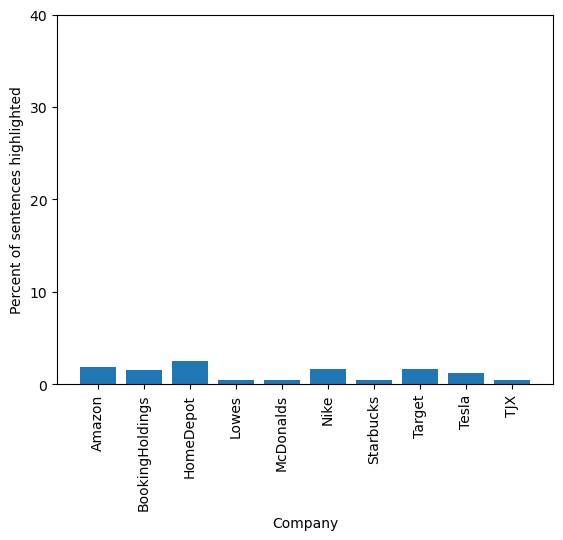

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Amazon", "BookingHoldings", "HomeDepot", "Lowes", "McDonalds", "Nike", "Starbucks", "Target", "Tesla", "TJX"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

# y.append(0)
# y.append(0)


plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [10]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      1.215385
std       0.730337
min       0.409463
25%       0.473101
50%       1.357410
75%       1.663995
max       2.502662
dtype: float64